In [1]:
from datetime import datetime
from re import sub
from decimal import Decimal

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
seattle_cal = pd.read_csv('seattle/calendar.csv')
seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
seattle_lis = pd.read_csv('seattle/listings.csv')
seattle_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [4]:
seattle_lis.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [5]:
seattle_rev = pd.read_csv('seattle/reviews.csv')
seattle_rev.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Section 1: Business Understanding
If I think in customers' shoes, I would be interested in the following questions
### Question 1: How is the price spatially distributed?
### Question 2: How does the price fluctuate by time?
### Question 3: Which areas have the highest price change in a year?
### Question 4: Which accomodations are more likely to be revisited?

## Section 2: Data Understanding

How much data do we have

In [6]:
seattle_cal.shape[0]

1393570

In [7]:
seattle_lis.shape[0]

3818

In [8]:
seattle_rev.shape[0]

84849

host_listings_count = host_total_listings_count?

In [9]:
seattle_lis[['host_listings_count', 'host_total_listings_count']][seattle_lis['host_listings_count']!=seattle_lis['host_total_listings_count']]

,host_listings_count,host_total_listings_count
1297,NaN,NaN
1419,NaN,NaN


How much missing data?

In [10]:
seattle_lis.columns[seattle_lis.isnull().mean()>0.27]

Index(['neighborhood_overview', 'notes', 'square_feet', 'weekly_price',
       'monthly_price', 'security_deposit', 'license'],
      dtype='object')

tables are drawn on 2016-01-03

In [11]:
seattle_rev.date.max()

'2016-01-03'

In [12]:
seattle_cal.date.min()

'2016-01-04'

how many revisits exist

In [13]:
df_revisit = seattle_rev.groupby(['reviewer_id', 'listing_id']).size()
df_revisit[df_revisit>1]

reviewer_id  listing_id
12561        496074        2
13139        443580        2
16549        132160        2
16613        86185         3
             613020        2
                          ..
47003083     3883137       2
47579596     7350992       2
47679162     7988337       2
48895136     7483750       2
49136419     8409941       2
Length: 1087, dtype: int64

In [14]:
df_revisit.max()

11

<AxesSubplot:>

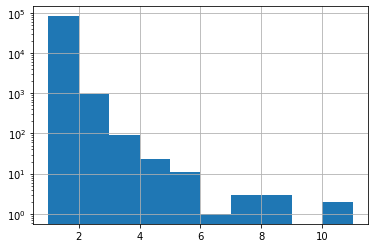

In [15]:
df_revisit.hist(log=True)

## Section 3: Data Preparation

how many times a accommodation is revisited

The num_revisits is defined as the total number of visits of repeated visitors.

In [16]:
listing_with_revisit = df_revisit[df_revisit>1].reset_index().groupby('listing_id').sum().reset_index()[['listing_id', 0]]
listing_with_revisit = listing_with_revisit.rename({0: 'num_revisits'}, axis='columns')
listing_with_revisit.head()

,listing_id,num_revisits
0,5682,14
1,6606,2
2,7369,2
3,9419,2
4,9460,2


In [17]:
seattle_lis = pd.merge(seattle_lis, listing_with_revisit, how='left', left_on='id', right_on='listing_id')
seattle_lis.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,listing_id,num_revisits
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,NaN,WASHINGTON,f,moderate,f,f,2,4.07,NaN,NaN
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,NaN,WASHINGTON,f,strict,t,t,6,1.48,953595.0,2.0
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,NaN,WASHINGTON,f,strict,f,f,2,1.15,NaN,NaN
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,WASHINGTON,f,flexible,f,f,1,NaN,NaN,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,NaN,WASHINGTON,f,strict,f,f,1,0.89,NaN,NaN


accommodations without revisits has 0 num_revisits

In [18]:
seattle_lis.num_revisits.fillna(0, inplace=True)

<AxesSubplot:>

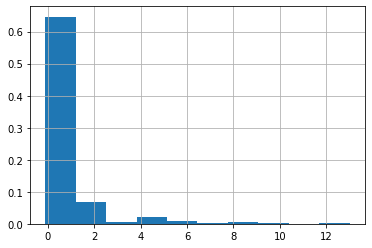

In [19]:
seattle_lis.num_revisits.hist(density=True, range=(-0.1, 13))

drop listing_id, which is the foreign key in the right table 

In [20]:
seattle_lis = seattle_lis.drop(['listing_id'], axis=1)

zip code

In [21]:
seattle_lis.zipcode.unique()

array(['98119', '98109', '98107', '98117', nan, '98103', '98105', '98115',
       '98101', '98122', '98112', '98144', '99\n98122', '98121', '98102',
       '98199', '98104', '98134', '98136', '98126', '98146', '98116',
       '98177', '98118', '98108', '98133', '98106', '98178', '98125'],
      dtype=object)

In [22]:
seattle_lis.loc[seattle_lis.zipcode=='99\n98122', 'zipcode'] = '98122'

Currency to int

In [23]:
def curr2num(x):
    '''
    currency in the table are prefixed with "$" and has decimal separator, this function convert
    the currency to number
    '''
    return Decimal(sub(r'[^\d.]', '', x))

seattle_cal.loc[seattle_cal['price'].notna(), 'price'] = seattle_cal.loc[seattle_cal['price'].notna(), 'price'].apply(curr2num).astype('float64')
seattle_lis.loc[seattle_lis['price'].notna(), 'price'] = seattle_lis.loc[seattle_lis['price'].notna(), 'price'].apply(curr2num).astype('float64')

seattle_lis.loc[seattle_lis['cleaning_fee'].notna(), 'cleaning_fee'] = seattle_lis.loc[seattle_lis['cleaning_fee'].notna(), 'cleaning_fee'].apply(curr2num).astype('float64')
seattle_lis.loc[seattle_lis['extra_people'].notna(), 'extra_people'] = seattle_lis.loc[seattle_lis['extra_people'].notna(), 'extra_people'].apply(curr2num).astype('float64')

percentage to float

In [24]:
def percentage2float(x):
    '''
    this function convert string representation of percentage to float
    '''
    return float(x[:-1])/100

seattle_lis.loc[seattle_lis['host_response_rate'].notna(), 'host_response_rate'] = \
    seattle_lis.loc[seattle_lis['host_response_rate'].notna(), 'host_response_rate'].apply(percentage2float).astype('float64')

host_since to "hostship": how long they host

In [25]:
seattle_lis.host_since

0       2011-08-11
1       2013-02-21
2       2014-06-12
3       2013-11-06
4       2011-11-29
           ...    
3813    2015-04-13
3814    2015-10-14
3815    2015-12-30
3816    2015-01-03
3817    2014-04-25
Name: host_since, Length: 3818, dtype: object

In [26]:
def timediff(x):
    time1 = datetime.strptime(x, "%Y-%m-%d")
    time2 = datetime.strptime("2016-01-03", "%Y-%m-%d")
    time_diff = time2 - time1
    return time_diff.days

seattle_lis['hostship'] = seattle_lis['host_since'].apply(lambda x: timediff(x) if pd.notnull(x) else x)

In [27]:
seattle_lis = seattle_lis.drop(['host_since'], axis=1)

drop urls/comments-like columns

In [28]:
drop_col_list = ['summary', 'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'xl_picture_url','host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url']
seattle_lis = seattle_lis.drop(drop_col_list, axis=1)

drop column without enough data

In [29]:
seattle_lis.columns[seattle_lis.isnull().mean()>0]

Index(['space', 'host_location', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'zipcode', 'property_type', 'bathrooms', 'bedrooms', 'beds',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'reviews_per_month', 'hostship'],
      dtype='object')

<AxesSubplot:>

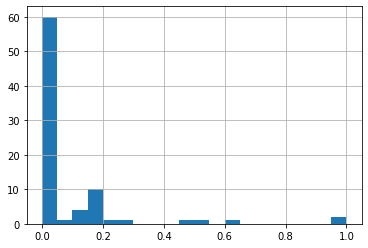

In [30]:
seattle_lis.isnull().mean().hist(bins=20)

In [31]:
seattle_lis.columns[seattle_lis.isnull().mean()>0.3]

Index(['square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'license'],
      dtype='object')

In [32]:
seattle_lis = seattle_lis.loc[:, seattle_lis.isnull().mean()<0.3]

### pre-select only numerical or categorical columns for regression model

In [33]:
numerical = ['hostship', 'host_response_rate', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'cleaning_fee',\
    'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30', 'availability_60', 'availability_90',\
    'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',\
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'num_revisits']

categorical = ['host_is_superhost', 'is_location_exact', 'host_has_profile_pic', 'host_identity_verified', 'property_type', 'room_type', 'bed_type', \
    'has_availability', 'requires_license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', \
    'require_guest_phone_verification']

binary = ['host_is_superhost', 'is_location_exact', 'host_has_profile_pic', 'host_identity_verified', \
    'has_availability', 'requires_license', 'instant_bookable', 'require_guest_profile_picture', \
    'require_guest_phone_verification']

multinary = list(set(categorical).difference(binary))

### imput

<AxesSubplot:>

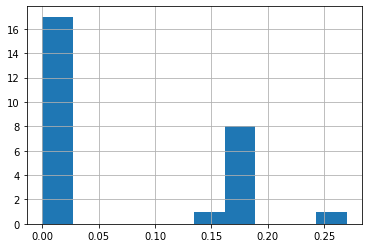

In [34]:
seattle_lis[numerical].isna().mean().hist()

some columns has quite some missing data. I will imput with mean data

In [35]:
seattle_lis[numerical].columns[seattle_lis[numerical].isna().mean()>0]

Index(['hostship', 'host_response_rate', 'host_total_listings_count',
       'bathrooms', 'bedrooms', 'beds', 'cleaning_fee', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [36]:
seattle_lis[numerical] = seattle_lis[numerical].apply(lambda col: col.fillna(col.mean()), axis=0)

<AxesSubplot:>

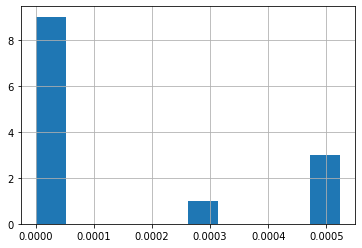

In [37]:
seattle_lis[categorical].isna().mean().hist()

But only a few categorical data are missing, therefore I'll simply remove those rows

In [38]:
seattle_lis[categorical].columns[seattle_lis[categorical].isna().mean()>0]

Index(['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'property_type'],
      dtype='object')

In [39]:
seattle_lis = seattle_lis.dropna(axis=0, subset=categorical)

In [40]:
seattle_lis[categorical+numerical].isna().any().any()

False

### encoding categorical data

#### convert columns with values true/false to 1/0

In [41]:
seattle_cal.available=seattle_cal.available.map({'t':1, 'f':0})
seattle_lis[binary] = seattle_lis[binary].apply(lambda col: col.map({'t':1, 'f':0}))

In [42]:
seattle_cal.head()

,listing_id,date,available,price
0,241032,2016-01-04,1,85.0
1,241032,2016-01-05,1,85.0
2,241032,2016-01-06,0,NaN
3,241032,2016-01-07,0,NaN
4,241032,2016-01-08,0,NaN


In [43]:
seattle_lis[binary].head()

,host_is_superhost,is_location_exact,host_has_profile_pic,host_identity_verified,has_availability,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,0,1,1,1,1,0,0,0,0
1,1,1,1,1,1,0,0,1,1
2,0,1,1,1,1,0,0,0,0
3,0,1,1,1,1,0,0,0,0
4,0,1,1,1,1,0,0,0,0


#### add dummy columns for categorical columns

In [44]:
seattle_lis_reg = pd.concat([pd.get_dummies(seattle_lis[multinary]), seattle_lis[numerical+binary]], axis=1)

## Section4: Modelling

feature selection

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = seattle_lis_reg.drop(['num_revisits'], axis=1)
y = seattle_lis_reg.num_revisits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = LinearRegression()
rfe = RFE(estimator=lm, n_features_to_select=1, step=1)
rfe.fit(X_train, y_train)


RFE(estimator=LinearRegression(), n_features_to_select=1)

In [47]:
ranking = rfe.ranking_.reshape(X_train.shape[1])
feature_ranking = list(zip(X_train.columns, ranking))
feature_ranking.sort(key=lambda x: x[1])

In [48]:
feature_ranking

[('bed_type_Couch', 1),
 ('bed_type_Pull-out Sofa', 2),
 ('bed_type_Real Bed', 3),
 ('bed_type_Airbed', 4),
 ('bed_type_Futon', 5),
 ('property_type_Cabin', 6),
 ('property_type_Loft', 7),
 ('property_type_House', 8),
 ('property_type_Camper/RV', 9),
 ('property_type_Other', 10),
 ('property_type_Apartment', 11),
 ('property_type_Bed & Breakfast', 12),
 ('property_type_Townhouse', 13),
 ('property_type_Condominium', 14),
 ('property_type_Treehouse', 15),
 ('property_type_Yurt', 16),
 ('property_type_Bungalow', 17),
 ('property_type_Dorm', 18),
 ('property_type_Boat', 19),
 ('property_type_Tent', 20),
 ('require_guest_phone_verification', 21),
 ('require_guest_profile_picture', 22),
 ('host_is_superhost', 23),
 ('is_location_exact', 24),
 ('reviews_per_month', 25),
 ('instant_bookable', 26),
 ('cancellation_policy_strict', 27),
 ('cancellation_policy_flexible', 28),
 ('host_response_rate', 29),
 ('room_type_Private room', 30),
 ('host_has_profile_pic', 31),
 ('review_scores_value', 32),

We can see from the above ranking result, the typ of the property has the highest influence whether guests will revisit the property or not

fit linear regression model

In [50]:
from sklearn.metrics import r2_score
lm.fit(X_train, y_train)
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
print(f"r2 score for training set: {r2_train}")
print(f"r2 score for test set: {r2_test}")

r2 score for training set: 0.5067286690240154
r2 score for test set: 0.3706570435666494


## Section 5: Evaluation

Both listings.csv and calendar.csv contain the column price. I assume the price in listings.csv is the "base price" for each accommodation. And the price in calendar.csv is the real price for for a certain day.

First of all, check if all available accommodations have prices.

In [52]:
seattle_cal[seattle_cal.available==1].price.notna().all()

True

Join the real price with the base price

In [53]:
df_price = pd.merge(seattle_cal[seattle_cal.available==1], seattle_lis, left_on='listing_id', right_on='id', how='left')[['listing_id', 'zipcode', 'date', 'price_x', 'price_y']]

calculate the price difference

In [54]:
df_price['price_diff']=df_price.price_x - df_price.price_y

Quick check of the distribution of price differences

In [55]:
df_price.head()

,listing_id,zipcode,date,price_x,price_y,price_diff
0,241032,98119,2016-01-04,85.0,85.0,0.0
1,241032,98119,2016-01-05,85.0,85.0,0.0
2,241032,98119,2016-01-13,85.0,85.0,0.0
3,241032,98119,2016-01-14,85.0,85.0,0.0
4,241032,98119,2016-01-18,85.0,85.0,0.0


In [56]:
(df_price.price_diff>0).mean()

0.21573348228330028

In [57]:
(df_price.price_diff<0).mean()

0.05396547185680258

check distribution of real price

/Users/peng.chen/.pyenv/versions/3.9.5/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_x'>

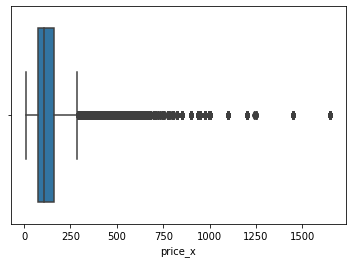

In [58]:
sns.boxplot(df_price['price_x'])

the price of the most properties lie below $300, the median price is around $120

visualize price change by time of each postal area

<AxesSubplot:xlabel='date', ylabel='zipcode'>

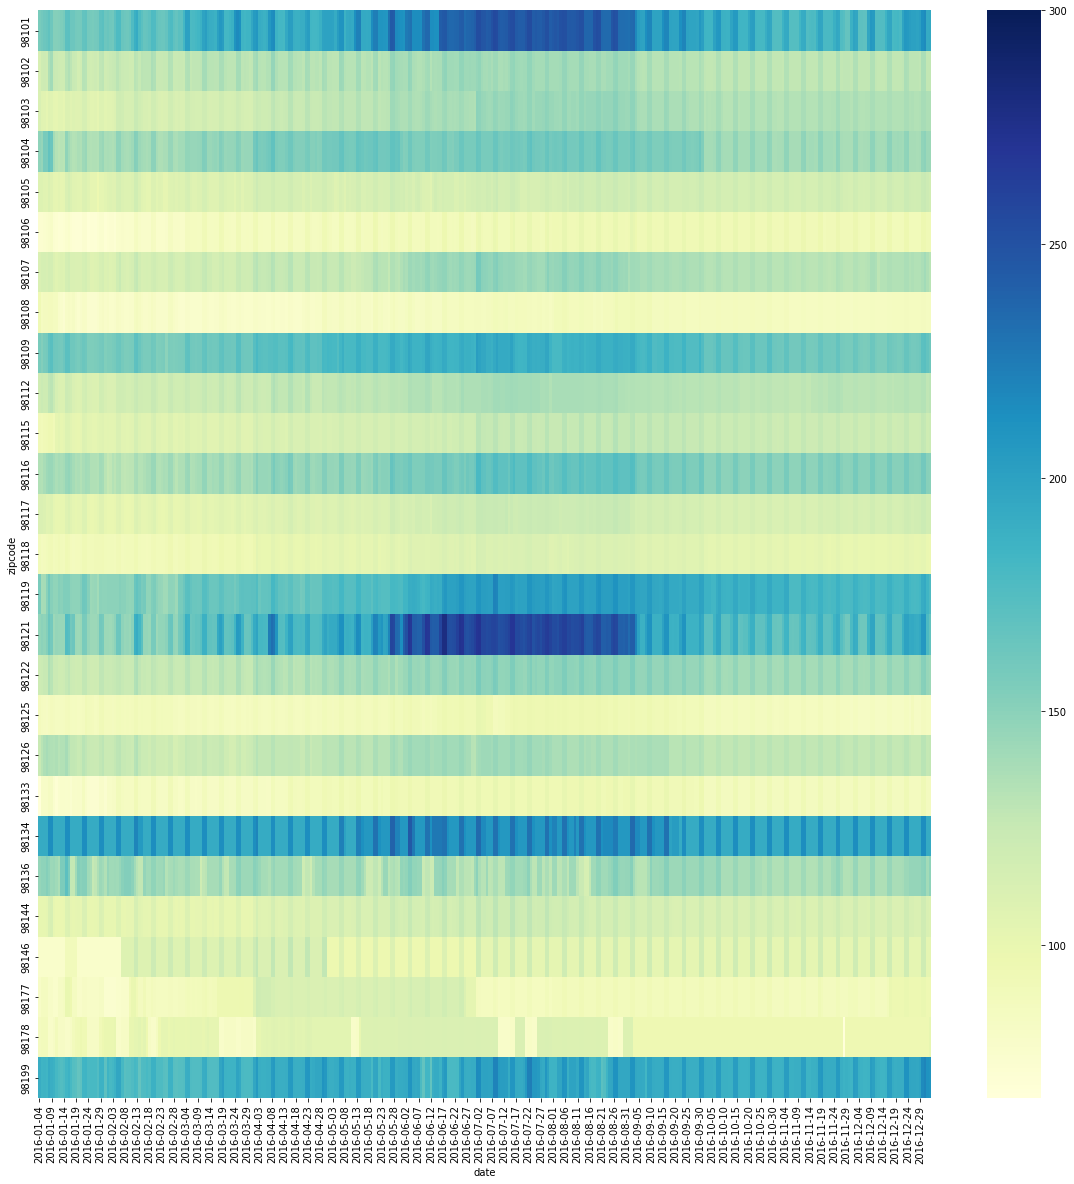

In [59]:
_, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_price[['date', 'zipcode', 'price_x']].groupby(['date', 'zipcode']).mean().reset_index().pivot('zipcode', 'date', 'price_x'), vmax=300, cmap="YlGnBu", ax=ax)

The fluctuation of price is not clear depicted here since different property have different price, therefore we need to subtract the base price and focus on the price changes'

check distribution of price difference

/Users/peng.chen/.pyenv/versions/3.9.5/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_diff'>

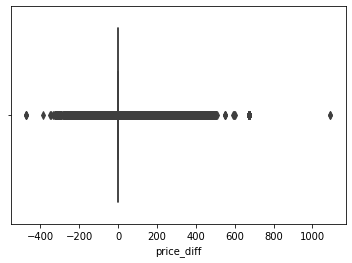

In [60]:
sns.boxplot(df_price['price_diff'])

Most properties have quite stable prices

price change by time of each postal code area

note here we subtract the real price with the base price

<AxesSubplot:xlabel='date', ylabel='zipcode'>

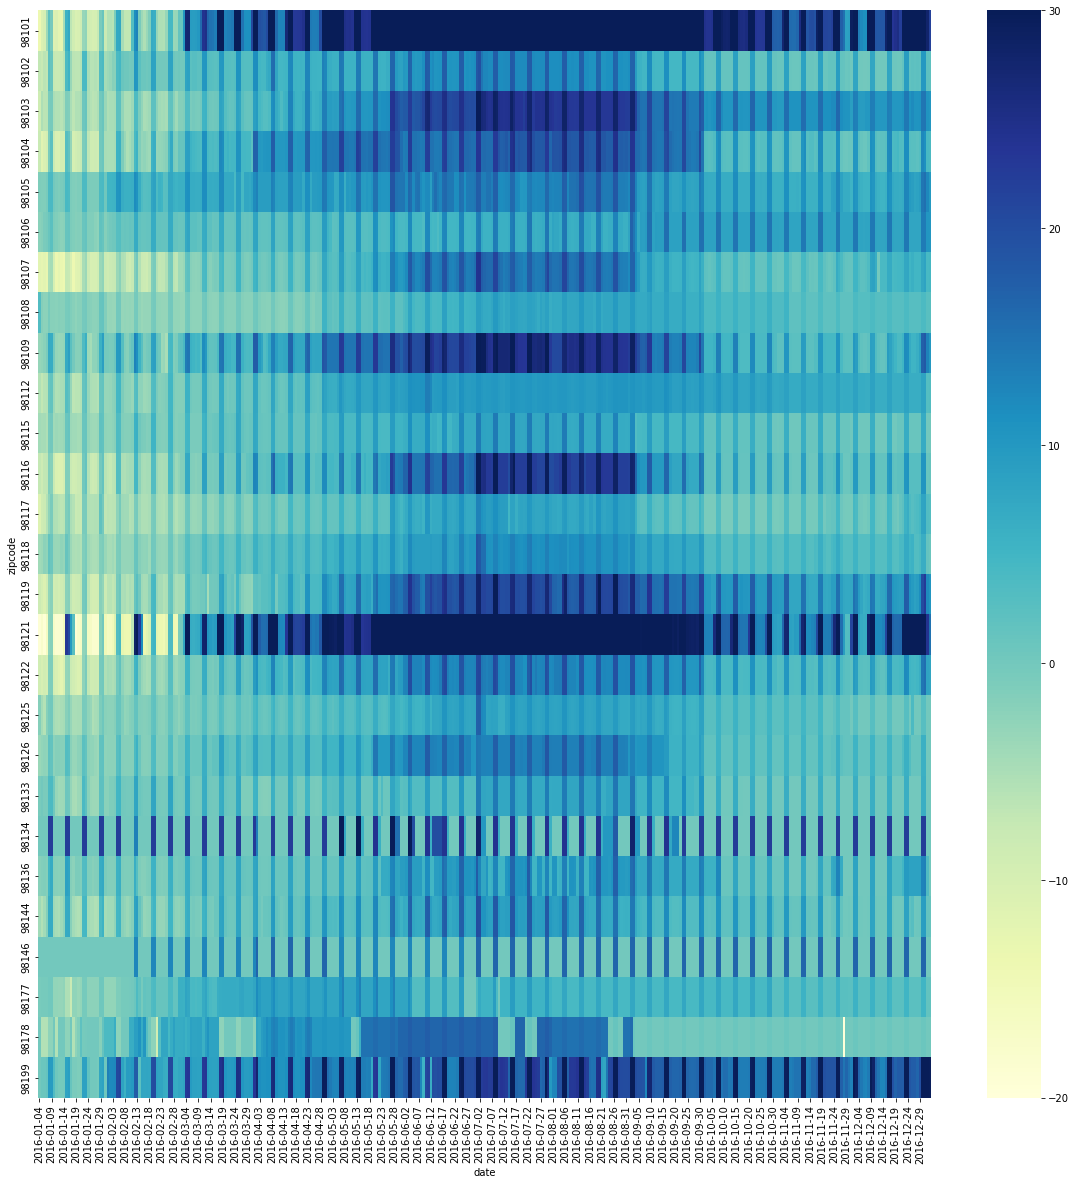

In [61]:
_, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df_price[['date', 'zipcode', 'price_diff']].groupby(['date', 'zipcode']).mean().reset_index().pivot('zipcode', 'date', 'price_diff'), vmax=30, vmin=-20, cmap="YlGnBu", ax=ax)

most properties have price change of (-20, 30). The price is commonly higher during summer

price - location

In [62]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

ModuleNotFoundError: No module named 'geopandas'

mean price of each postal code area

In [ ]:
df_geo_price = df_price[['zipcode', 'price_x']].groupby(['zipcode']).mean().reset_index()

In [ ]:
df_geo_price

,zipcode,price_x
0,98101,201.579881
1,98102,133.495981
2,98103,131.372552
3,98104,150.839620
4,98105,114.813577
5,98106,89.612233
6,98107,131.984608
7,98108,84.353926
8,98109,172.418371
9,98112,129.414610


visualize

In [ ]:
zip_code_boundary=gpd.read_file('Zip_Codes.geojson')

zip_code_boundary_price=gpd.GeoDataFrame(pd.merge(df_geo_price, zip_code_boundary, left_on='zipcode', right_on='ZIPCODE'), geometry=zip_code_boundary.geometry)

this part is run in another environment with geopandas installed, I paste the result here
![geo_price](images/geo_price.png)

some districts have higher price change within a year